# code alongs - overfitting and underfitting
### simulate data
$y = a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error  is standard normal distributed)


In [129]:
import numpy as np
import matplotlib.pyplot as plt

samples = 100
X = np.random.uniform(-3,3, (samples,1))
X.shape

(100, 1)

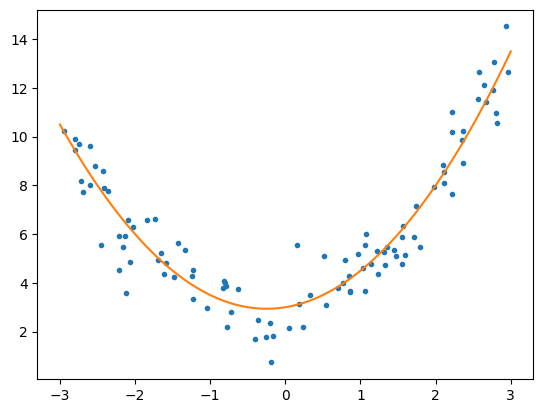

In [130]:

# a0 = 3, a1 = 0.5, a2 = 1
f = lambda x: x**2 + 0.5*x + 3
# y = a0 + a1x + a2x^2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# linspace gives equally spaced numbers between low and high
# between -3 and 3 we get 100 equally spaced numbers
x = np.linspace(-3,3, samples )

plt.plot(X,y, '.')
plt.plot(x, f(x))



<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

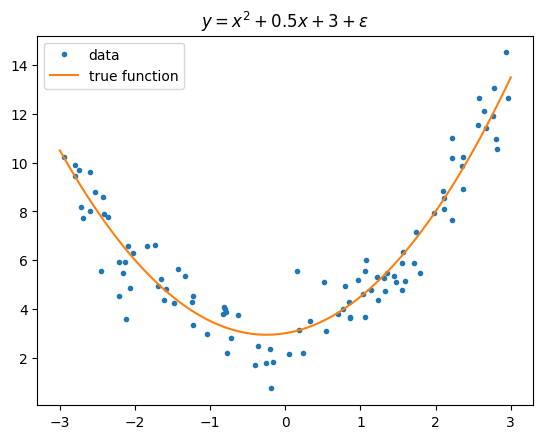

In [131]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X,y, '.', label="data")
    ax.plot(x, f(x), label="true function")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()

    return ax
draw_data()

### Feature engineering

In [132]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of 1s are included, and if false its excluded
# we use False as LinearRegression() handles the bias 
# instantiate a PolynomialFeatures instance from the PolynomialFeatures class 
poly = PolynomialFeatures(degree=2, include_bias=False)

# from X had [x1] -> now it has [x1 x1^2] 
poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape


(array([[ 1.45029076,  2.10334328],
        [-1.04807386,  1.09845882],
        [ 1.55552246,  2.41965013],
        [ 1.7966338 ,  3.22789302],
        [ 2.64056734,  6.97259586]]),
 (100, 2))

### trained on transformed dataset

In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated: a1, a2 from data, note that true value was a1=0.5, a2=1
model.coef_

array([[0.53508016, 1.0051682 ]])

In [134]:
# estimate  a0  from data, note  that true  a0= 3
model.intercept_

array([2.88115058])

# visual  true model and estimated model

In [135]:
# x is our linspace, its 1 dimensional
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

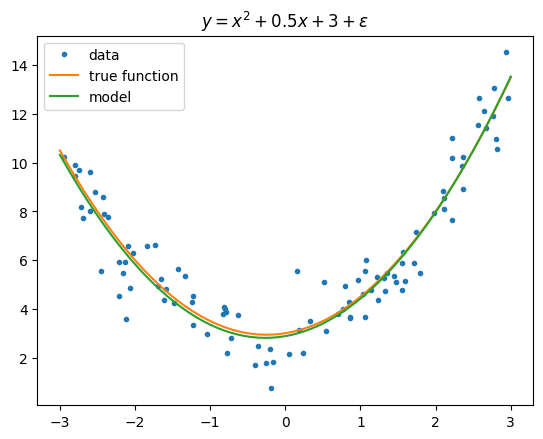

In [136]:
x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()

# underfitting


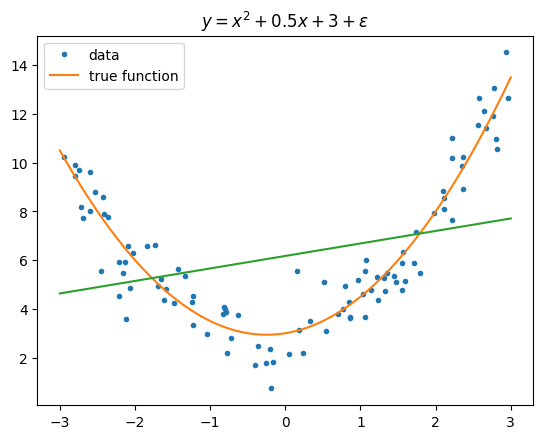

In [137]:

model = LinearRegression()
# we haven't transformed the feature space, so we get a linear model
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))

# overfitting

In [138]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)

X_features = poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [139]:
x_poly_features = poly_model_30.transform(x.reshape(-1,1))
x_poly_features.shape

(100, 30)

In [ ]:
model = LinearRegression()
model.fit(X_features, y)

y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1,15], title="Overfitted model")

# choose a model


In [140]:
#simulate new data  
samples = 10000
X = np.random.uniform(-3,3,(samples, 1))
X.shape


(10000, 1)

In [141]:
f = lambda x: x**4 + x**2 +.5*x + 3
y = f(X) + np.random.randn(samples, 1)  #plottar vi denna är det en fjärdegradare **4
y.shape

(10000, 1)

### Train|validation|test|split
split data into 
- train - train on training set
- validation - tune hyperparameter on validation test 
- test - evaluate on test  set

In our case our  degree is a hyperparameter

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state= 42)

X_val, X_test, y_val, y_test = train_test_split(
    X,y, test_size=0.5, random_state= 42)


X_train.shape, X_val.shape, X_test.shape


((6700, 1), (5000, 1), (5000, 1))

# Train and predict on validation

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE_val = []
model_poly =  PolynomialFeatures(degree, include_bias=False)
train_features = model_poly.fit_transform(X_train)
val_features = model_poly.fit_transform(X_val)
model_linear_regression = LinearRegression()

model_linear_regression.fit(train_features, y_train)
y_pred_val = model_linear_regression.predict(val_features)
RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

